<a href="https://colab.research.google.com/github/Atzingen/IA-FIC2021/blob/main/01_notebook_e_mnist_tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
import cv2
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras import datasets

In [12]:
(x_train, y_train_raw), (x_test, y_test_raw) = datasets.mnist.load_data()

In [13]:
input_shape = (28, 28, 1)

x_train = x_train/255.0
x_test = x_test/255.0

y_train = tf.keras.utils.to_categorical(y_train_raw, 10)
y_test = tf.keras.utils.to_categorical(y_test_raw, 10)

In [14]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [11]:
y_train.shape, y_test.shape

((60000, 10), (10000, 10))

In [15]:
@interact(i=10)
def plot_image(i):
  fig = px.imshow(x_train[i], title=str(y_train[i]) + " -> " + str(y_train_raw[i]), width=800, height=800)
  fig.show()

interactive(children=(IntSlider(value=10, description='i', max=30, min=-10), Output()), _dom_classes=('widget-…

In [ ]:
model = tf.keras.Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
model.fit(x=x_train, y=y_train, validation_split=0.3, epochs=10)

Epoch 1/10
1313/1313 [==============================] - 39s 8ms/step - loss: 0.1567 - accuracy: 0.9516 - val_loss: 0.0619 - val_accuracy: 0.9819
Epoch 2/10
1313/1313 [==============================] - 10s 8ms/step - loss: 0.0481 - accuracy: 0.9849 - val_loss: 0.0468 - val_accuracy: 0.9856
Epoch 3/10
1313/1313 [==============================] - 10s 8ms/step - loss: 0.0337 - accuracy: 0.9892 - val_loss: 0.0454 - val_accuracy: 0.9865
Epoch 4/10
1313/1313 [==============================] - 9s 7ms/step - loss: 0.0236 - accuracy: 0.9925 - val_loss: 0.0509 - val_accuracy: 0.9852
Epoch 5/10
1313/1313 [==============================] - 9s 7ms/step - loss: 0.0187 - accuracy: 0.9941 - val_loss: 0.0430 - val_accuracy: 0.9883
Epoch 6/10
1313/1313 [==============================] - 10s 8ms/step - loss: 0.0145 - accuracy: 0.9951 - val_loss: 0.0494 - val_accuracy: 0.9878
Epoch 7/10
1313/1313 [==============================] - 10s 8ms/step - loss: 0.0114 - accuracy: 0.9962 - val_loss: 0.0563 - val_accu

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test accuracy:", score[1])

Test accuracy: 0.9901999831199646


# Esta parte funciona apenas no colab

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


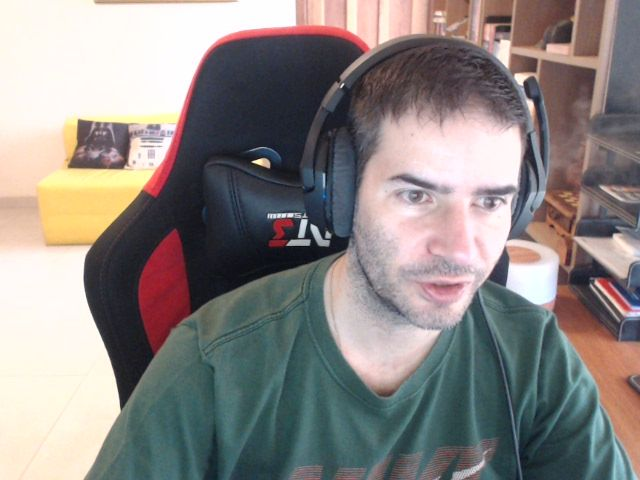

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  display(Image(filename))
except Exception as err:
  print(str(err))

In [ ]:
img = cv2.imread('1.png')
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
img = cv2.resize(img, (28, 28))
img = img/255.0
img = np.expand_dims(img, axis=0)
img=img.reshape(img.shape[0], img.shape[1], img.shape[2], 1)

In [ ]:
resultado_one_hot = model.predict(img)
print(resultado_one_hot, np.argmax(resultado_one_hot))

[[1.2665801e-03 3.9065704e-03 9.4118486e-06 2.2748308e-11 9.9258935e-01
  9.8685653e-08 1.9244800e-03 3.0024955e-04 2.1812684e-06 1.0226499e-06]] 4
